**Voorbereiding: Jupyter Notebook initialiseren**

In [1]:
import sys
sys.path.append('D:/Python/Projecten/pypv/lib')  # add my own lib folder to Python's search path
sys.path.append('D:/Python/Projecten/pypv/datafiles')  # also add the folder with the data files

In [2]:
from IPython.display import Image, HTML
import sun
import photovoltaic as pv
from quantities.date_time import Date, ANY_YEAR

`sun`, `photovoltaic` en `quantities` zijn drie zelf geschreven Python *packages* (*libraries*) die alle programmatuur bevatten om de computer de berekeningen te laten uitvoeren.
* `sun` bevat onder meer de programmacode om horizonprofielen, zonnebaandiagrammen en de zonnebestralingssterkte (irradiantie) op een oppervlak te berekenen.
* `photovoltaic` modelleert de componenten van een fotovoltaïsche installatie (o.a. zonnepaneel, zonnepanelenmatrix, omvormer) en de programmcode om een energieanalyse te maken.
* `quantities` is een secundaire *package* waarin fysische grootheden worden gemodelleerd (o.a. tijd, datum). 

# DEEL 1 | ZONNEBAANDIAGRAM EN HORIZONPROFIELEN

In deze *notebook* worden het zonnebaandiagram en de horizonprofielen bepaald voor zonnepanelen op het platte dak van de achterbouw van mijn woning dat is aangeduid met het rode ballonnetje op de luchtfoto hieronder.

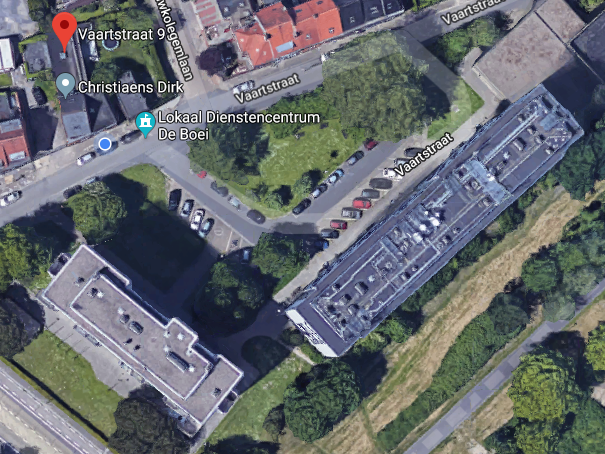

In [4]:
Image(filename='../images/locatie.png')

## Stap 1: Ingave van de Geografische Locatie

Een locatie wordt gekenmerkt door volgende parameters:

* de naam van de locatie
* de regio waarin de locatie is gelegen
* de breedtegraad van de locatie
* de lengtegraad van de locatie
* de hoogte van de locatie boven de zeespiegel
* optioneel: de tijdzone waarin de locatie is gelegen (de naam van een tijdzone is de aanduiding die men kan terugvinden in de [tz database](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)).

A.h.v. de breedtegraad, de lengtegraad en de hoogte boven de zeespiegel kan het programma de positie van de zon berekenen op de gegeven geografische locatie voor elke dag en tijdstip van het jaar. De naam van de locatie en de regio zijn een geheugensteuntje voor de gebruiker, maar zijn voor het programma eigenlijk van geen belang.
Indien er geen tijdzone wordt opgegeven, zal het programma zich baseren op de gecoördineerde wereldtijd (UTC).

In [5]:
loc = sun.Location(
    name='Ghent',
    region='Belgium',
    latitude=51.07,
    longitude=3.69,
    altitude=9.0
)

## Stap 2: Creëren van de Horizonprofielen

Met de app *AngleCam*, geïnstalleerd op een smartphone, zijn een reeks foto's genomen van "horizon-obstakelpunten" die de contouren van het horizonprofiel begrenzen. De foto's werden genomen op het platte dak van de achterbouw van de woning, ongeveer vanop een plek waar zonnepanelen zouden geplaatst worden. De *AngleCam*-app schrijft de azimut- en elevatiehoek van elk gefotografeerd obstakelpunt weg in een *csv*-bestand op de smartphone. Dit bestand kan vervolgens vanaf de smartphone naar een computer worden getransfereerd en vervolgens in een spreadsheetprogramma of teksteditor geopend. Daarnaast moeten ook nog de vlakke afstanden (in meter) worden ingevoerd van de obstakelpunten tot het referentiepunt van waaruit de foto's zijn genomen. Die vlakke afstanden kunnen in *Google Maps* worden opgemeten. 

### Horizonprofiel 1 met referentiepunt vooraan op het platte dak

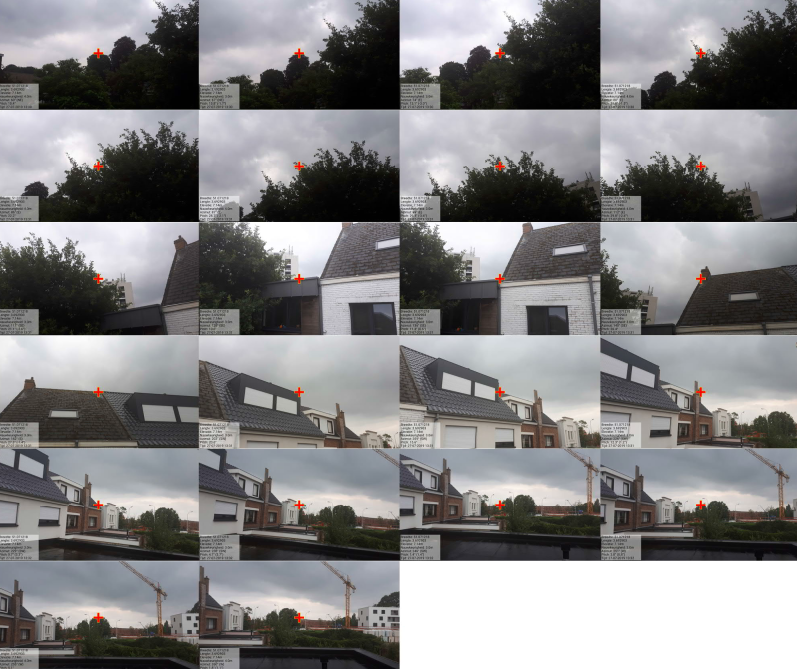

In [6]:
Image(filename='../images/horizonptn_veld1.png')

**Invoeren van de horizon-obstakelpunten in het programma**<br>
De horizon-obstakelpunten worden in de `sun` *package* gemodelleerd door de klasse `HorizonPoint`. Deze objecten worden in een Python-lijst `points_hp01` bijgehouden.

In [7]:
points_hp01 = [
    sun.HorizonPoint(label='1', planar_distance=93.0, azimuth=60.0, elevation=10.4),
    sun.HorizonPoint(label='2', planar_distance=113.0, azimuth=67.0, elevation=15.8),
    sun.HorizonPoint(label='3', planar_distance=104.0, azimuth=74.0, elevation=13.1),
    sun.HorizonPoint(label='4', planar_distance=13.0, azimuth=80.0, elevation=21.8),
    sun.HorizonPoint(label='5', planar_distance=12.0, azimuth=86.0, elevation=22.2),
    sun.HorizonPoint(label='6', planar_distance=12.0, azimuth=87.0, elevation=28.7),
    sun.HorizonPoint(label='7', planar_distance=12.0, azimuth=99.0, elevation=29.9),
    sun.HorizonPoint(label='8', planar_distance=12.0, azimuth=112.0, elevation=29.8),
    sun.HorizonPoint(label='9', planar_distance=12.0, azimuth=117.0, elevation=21.1),
    sun.HorizonPoint(label='10', planar_distance=7.0, azimuth=131.1, elevation=10.6),
    sun.HorizonPoint(label='11', planar_distance=7.0, azimuth=136.0, elevation=11.3),
    sun.HorizonPoint(label='12', planar_distance=11.0, azimuth=140.0, elevation=26.4),
    sun.HorizonPoint(label='13', planar_distance=12.0, azimuth=162.1, elevation=27.3),
    sun.HorizonPoint(label='14', planar_distance=13.0, azimuth=203.0, elevation=20.6),
    sun.HorizonPoint(label='15', planar_distance=20.0, azimuth=205.0, elevation=15.6),
    sun.HorizonPoint(label='16', planar_distance=28.0, azimuth=226.0, elevation=12.3),
    sun.HorizonPoint(label='17', planar_distance=34.0, azimuth=229.0, elevation=5.7),
    sun.HorizonPoint(label='18', planar_distance=44.0, azimuth=238.0, elevation=4.7),
    sun.HorizonPoint(label='19', planar_distance=59.0, azimuth=246.0, elevation=1.4),
    sun.HorizonPoint(label='20', planar_distance=66.0, azimuth=251.0, elevation=3.8),
    sun.HorizonPoint(label='21', planar_distance=70.0, azimuth=255.0, elevation=5.1),
    sun.HorizonPoint(label='22', planar_distance=63.0, azimuth=260.0, elevation=1.8),
]

De foto's werden rechtopstaand genomen. De zonnepanelen zullen zich echter lager op het platte dak situeren. Om die reden wordt het referentiepunt 1,7 meter lager gebracht:

In [8]:
for pnt in points_hp01: pnt.move_viewpoint(0.0, 0.0, -1.7)

**Configuratie van het horizonprofiel `hp_01`**<br>
Om een horizonprofiel te creëren volstaat het om de lijst met horizonpunten door te geven aan de constructor van de `HorizonProfile`-klasse.

In [9]:
hp_01 = sun.HorizonProfile(id_='hp_01', points=points_hp01)

De parameter `id_` dient om een naam toe te kennen aan het horizonprofiel, in dit geval de string `'hp_01'`.

### Horizonprofiel 2 met referentiepunt achteraan op het platte dak

Op analoge wijze werd een tweede reeks foto's genomen vanop een plek achteraan op het platte dak.

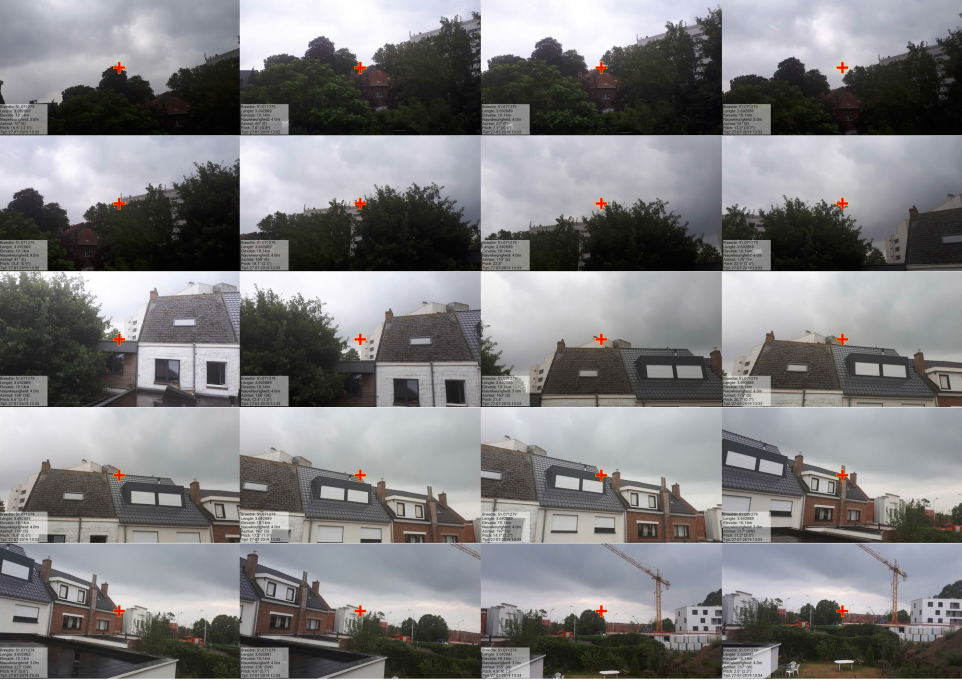

In [10]:
Image(filename='../images/horizonptn_veld2.png')

**Invoeren van de horizon-obstakelpunten in het programma**

In [11]:
points_hp02 = [
    sun.HorizonPoint(label='1', planar_distance=140.0, azimuth=70.0, elevation=15.5),
    sun.HorizonPoint(label='2', planar_distance=56.0, azimuth=80.0, elevation=7.0),
    sun.HorizonPoint(label='3', planar_distance=50.0, azimuth=83.0, elevation=7.1),
    sun.HorizonPoint(label='4', planar_distance=75.0, azimuth=81.0, elevation=13.2),
    sun.HorizonPoint(label='5', planar_distance=115.0, azimuth=91.0, elevation=13.4),
    sun.HorizonPoint(label='6', planar_distance=104.0, azimuth=108.0, elevation=18.1),
    sun.HorizonPoint(label='7', planar_distance=15.0, azimuth=110.0, elevation=22.8),
    sun.HorizonPoint(label='8', planar_distance=13.0, azimuth=125.0, elevation=22.9),
    sun.HorizonPoint(label='9', planar_distance=13.0, azimuth=138.0, elevation=6.6),
    sun.HorizonPoint(label='10', planar_distance=87.0, azimuth=138.1, elevation=12.4),
    sun.HorizonPoint(label='11', planar_distance=48.0, azimuth=163.0, elevation=21.4),
    sun.HorizonPoint(label='12', planar_distance=54.0, azimuth=175.0, elevation=20.7),
    sun.HorizonPoint(label='13', planar_distance=18.0, azimuth=175.1, elevation=18.4),
    sun.HorizonPoint(label='14', planar_distance=20.0, azimuth=192.0, elevation=17.2),
    sun.HorizonPoint(label='15', planar_distance=24.0, azimuth=197.0, elevation=14.7),
    sun.HorizonPoint(label='16', planar_distance=32.0, azimuth=217.0, elevation=11.2),
    sun.HorizonPoint(label='17', planar_distance=35.0, azimuth=223.0, elevation=4.1),
    sun.HorizonPoint(label='18', planar_distance=44.0, azimuth=236.0, elevation=4.9),
    sun.HorizonPoint(label='19', planar_distance=67.0, azimuth=255.0, elevation=4.9),
    sun.HorizonPoint(label='20', planar_distance=63.0, azimuth=257.0, elevation=2.0)
]

In [12]:
for pnt in points_hp02: pnt.move_viewpoint(0.0, 0.0, -1.7)

**Configuratie van het horizonprofiel `hp_02`**

In [13]:
hp_02 = sun.HorizonProfile(id_='hp_02', points=points_hp02)

## Stap 3: Zonnebaandiagrammen tekenen

**Zonnebanen definiëren**

We zullen voor elke maand van het jaar één zonnebaan uitpikken, nl. de zonnebaan op de 21ste dag van elke maand. Een zonnebaan wordt in het computerprogramma gemodelleerd door de `SunPath` klasse. We zullen dus 12 `SunPath` objecten aanmaken (instantiëren), die we zullen bijhouden in een lijst:

In [16]:
sun_path_list = [sun.SunPath(loc, Date(ANY_YEAR, m, 21)) for m in range(1, 13)]

**Zonnebaandiagram verbonden aan horizonprofiel 1 (vooraan op het platte dak)**

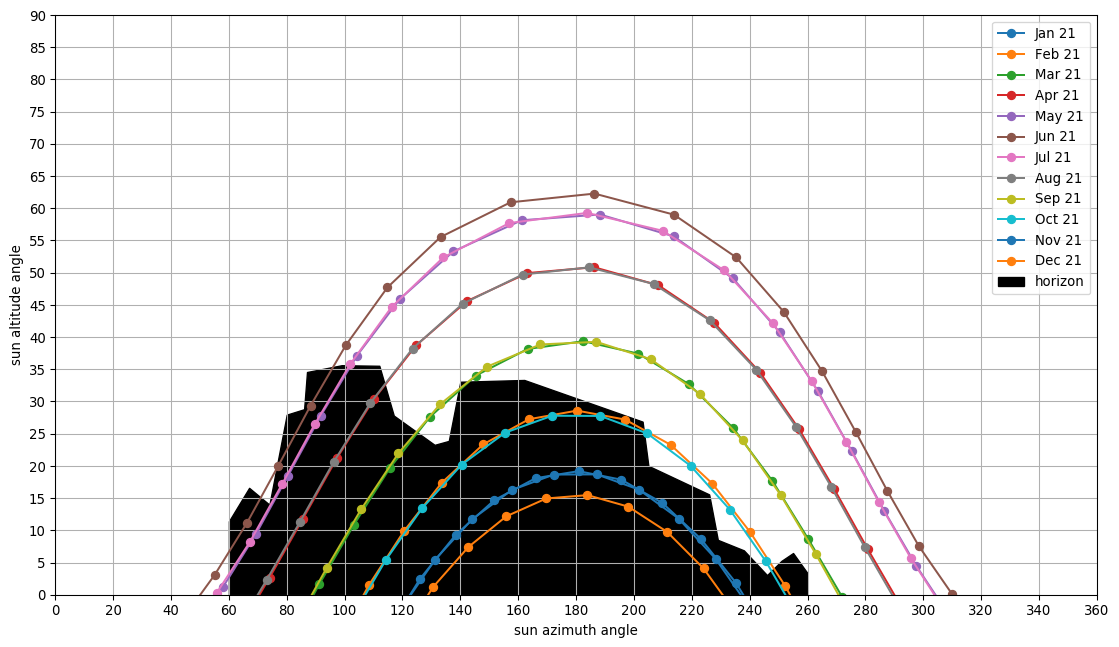

In [17]:
p = sun.plot_sun_path_diagram(sun_path_list, hp_01, size=(14, 8), dpi=96)
p.show_graph()

**Zonnebaandiagram verbonden aan horizonprofiel 2 (achteraan op het platte dak)**

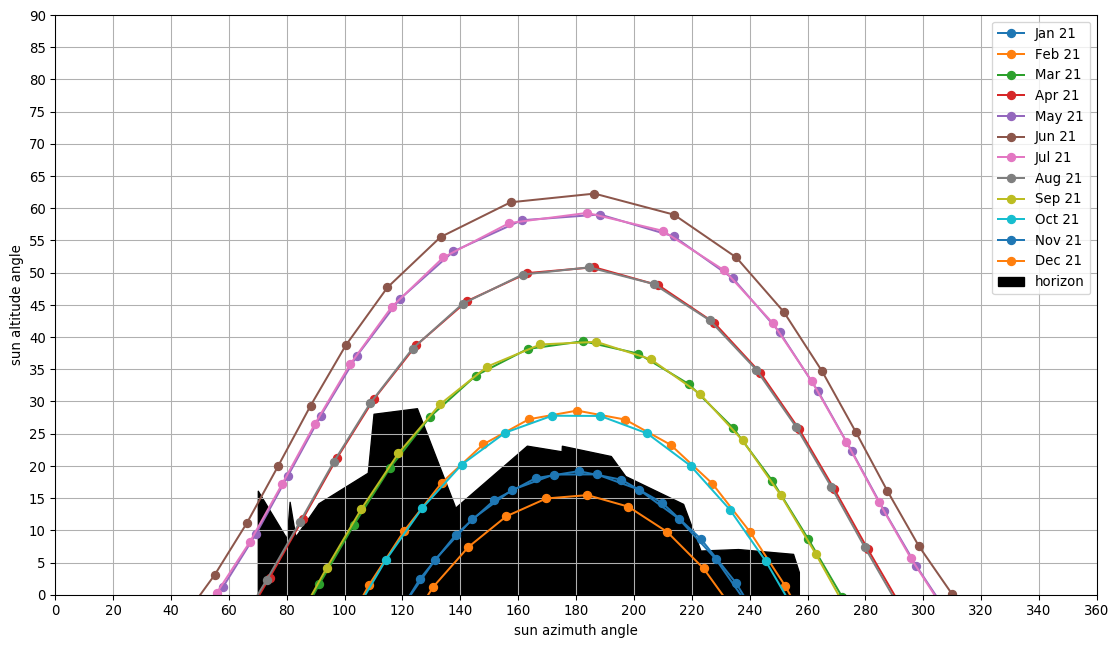

In [19]:
p = sun.plot_sun_path_diagram(sun_path_list, hp_02, size=(14, 8), dpi=96)
p.show_graph()

De zonnebaandiagrammen beschrijven voor elke 21ste van de maand het traject dat de zon langs de hemelkoepel beschrijft. Noteer dat de azimuthoek van 180° overeenstemt met het zuiden. Punten op een zonnebaan die binnen de contour van het horizonprofiel vallen, zijn posities van de zon waarbij de zon achter de horizon verscholen zit. Op die momenten kan er geen direct zonlicht op de zonnepanelen invallen. Daarmee zal het computerprogramma rekening houden wanneer de jaarlijkse energieopbrengst van de fotovoltaische installatie wordt berekend.